In [23]:
import pandas as pd
import numpy as np

df = pd.read_pickle('R-TXF1-1Minute-Trade-2016.pkl')

In [24]:
back_bar_num = 1500
forward_bar_num = 300
df['AVG'] = (df['High'] + df['Low'] + df['Close']) / 3
tmp_df = df['Open']
df['Norm Open'] = (tmp_df - df['AVG'].rolling(back_bar_num).mean()) / df['AVG'].rolling(back_bar_num).std()
tmp_df = df['High']
df['Norm High'] = (tmp_df - df['AVG'].rolling(back_bar_num).mean()) / df['AVG'].rolling(back_bar_num).std()
tmp_df = df['Low']
df['Norm Low'] = (tmp_df - df['AVG'].rolling(back_bar_num).mean()) / df['AVG'].rolling(back_bar_num).std()
tmp_df = df['Close']
df['Norm Close'] = (tmp_df - df['AVG'].rolling(back_bar_num).mean()) / df['AVG'].rolling(back_bar_num).std()
tmp_df = df['Volume']
df['Norm Volume'] = (tmp_df - tmp_df.rolling(back_bar_num).mean()) / tmp_df.rolling(back_bar_num).std()
df['Highest'] =  df['High'].rolling(forward_bar_num).max().shift(-1 * forward_bar_num)
df['Max Gain'] = df['Highest'] - df['Open'].shift(-1)
df['Lowest'] =  df['Low'].rolling(forward_bar_num).min().shift(-1 * forward_bar_num)
df['Max Loss'] = df['Lowest'] - df['Open'].shift(-1)
new_df = df[back_bar_num:-1 * forward_bar_num]
new_df['class'] = 0
new_df['class'][(new_df['Max Loss'] > -50) & (new_df['Max Gain'] > 50)] = 1
# new_df['class'][(new_df['Max Loss'] > -50) & (new_df['Max Gain'] > 100)] = 2
# new_df['class'][(new_df['Max Loss'] > -50) & (new_df['Max Gain'] > 200)] = 3
# new_df['class'][(new_df['Max Loss'] > -50) & (new_df['Max Gain'] > 300)] = 4
new_df['class0'] = 0
new_df['class0'][new_df['class'] == 0] = 1
new_df['class1'] = 0
new_df['class1'][new_df['class'] == 1] = 1
new_df['class2'] = 0
new_df['class2'][new_df['class'] == 2] = 1
new_df['class3'] = 0
new_df['class3'][new_df['class'] == 3] = 1
new_df['class4'] = 0
new_df['class4'][new_df['class'] == 4] = 1
print(new_df[new_df['class'] == 0].size / new_df.size)
print(new_df.describe())

/Users/cb.hsu/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cb.hsu/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cb.hsu/anaconda/envs/py3/lib/python3.6/site-packages/pandas/core/generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/

0.6076102218477956
               Open          High           Low         Close        Volume  \
count  71220.000000  71220.000000  71220.000000  71220.000000  71220.000000   
mean    8741.853777   8744.151264   8739.549761   8741.862496    419.673771   
std      445.198435    444.760407    445.606234    445.178945    508.754386   
min     7513.000000   7529.000000   7503.000000   7526.000000      1.000000   
25%     8465.000000   8468.000000   8463.000000   8465.000000    122.000000   
50%     8772.000000   8774.000000   8769.000000   8772.000000    259.000000   
75%     9137.000000   9139.000000   9135.000000   9137.000000    521.000000   
max     9438.000000   9440.000000   9434.000000   9438.000000   9838.000000   

            Highest          Gain           AVG     Norm Open     Norm High  \
count  71220.000000  71220.000000  71220.000000  71220.000000  71220.000000   
mean    8799.679809     87.942628   8741.854507      0.171218      0.215083   
std      433.997838    122.04292

In [25]:
num = 20
X = pd.DataFrame()
for i in range(num):
    X = pd.concat(
        [
            X,
            new_df[['Norm Open', 'Norm High', 'Norm Low', 'Norm Close', 'Norm Volume']].shift(-i),
            ],
        axis=1)
## for i in range(num):
##     X = pd.concat(
##         [
##             X,
##             new_df[['Norm Open', 'Norm High', 'Norm Low', 'Norm Close', 'Norm Volume']].shift(-i),
##             ],
##         axis=1)
X = X[:-num]
y = new_df['Max Gain'][:-num]
## y = new_df[['class0', 'class1', 'class2', 'class3', 'class4']][:-num]

In [26]:
from __future__ import print_function
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## X_test0 = X_test[y_test['class0'] == 1].as_matrix()
## X_test1 = X_test[y_test['class1'] == 1].as_matrix()
## y_train = y_train.as_matrix()
## y_test0 = y_test[y_test['class0'] == 1].as_matrix()
## y_test1 = y_test[y_test['class1'] == 1].as_matrix()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(53400, 100)
(53400,)
(17800, 100)
(17800,)


In [33]:
# example of training a final regression model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(30, input_dim=100, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, epochs=5, batch_size=16)

Epoch 1/5
53400/53400 [==============================] - 14s 264us/step - loss: 2233.7013
Epoch 2/5
53400/53400 [==============================] - 13s 250us/step - loss: 2014.4156
Epoch 3/5
53400/53400 [==============================] - 16s 303us/step - loss: 1996.2110
Epoch 4/5
53400/53400 [==============================] - 16s 298us/step - loss: 1988.0220
Epoch 5/5
53400/53400 [==============================] - 11s 211us/step - loss: 1978.1098


In [34]:
y_predict = model.predict(X_test)
y_test_np = y_test.as_matrix()

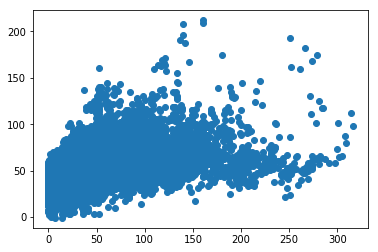

In [35]:
%matplotlib inline
plt.scatter(y_test, y_predict)
## plt.show()

In [56]:
model.save('my_model.h5') 

In [116]:
aa = pd.DataFrame(data=y_predict, columns=['Predict'])
bb = pd.concat([y_test.reset_index(), aa], axis=1)
print(bb[(bb['Predict'] > 100) & (bb['Max Gain'] > 80)].size / bb[bb['Predict'] > 100].size)
cc = bb.set_index('Date Time')

print(X_test.as_matrix()[:1])

0.6838487972508591
[[ 1.04284203  1.22799552  1.03358436  1.15393413  4.08740476  1.14378127
   1.19012498  1.14378127  1.1715875   0.56471186  1.16141734  1.17069667
   1.14285868  1.16141734  0.02178154  1.16039893  1.25328946  1.15110987
   1.21613325  2.26367972  1.22443234  1.23373068  1.18723898  1.20583566
  -0.01653166  1.20484699  1.22346268  1.18623129  1.20484699 -0.16761316
   1.21321098  1.24116415  1.17594009  1.17594009  0.23903009  1.19363283
   1.19363283  1.15632247  1.17497765 -0.13329195  1.16473457  1.17407236
   1.11804558  1.13672117  0.53916698  1.13576197  1.16380548  1.12641414
   1.13576197 -0.35638955  1.13480153  1.16287513  1.12544366  1.13480153
  -0.36162232  1.13381177  1.17128139  1.11507697  1.11507697 -0.3124253
   1.13278721  1.14216365  1.11403431  1.14216365 -0.4785057   1.1411083
   1.16926419  1.131723    1.16926419 -0.2675526   1.16828623  1.16828623
   1.1401018   1.14949661 -0.56091619  1.15790666  1.16731107  1.14850225
   1.14850225 -0.5137